# <a name="top"></a>Udacity Project: Wrangle and Analyze Data

## Table of Contents

0. **[Introduction](#intro)**
1. **[Gather](#gath)**
2. **[Assess](#assess)**
3. **[Clean](#clean)**
4. **[Store, Analyze and Visualize](#store)**

## <a name="intro"></a>Introduction

The aim of this project is to wrangle data, that is, gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, and clean it using Python and its libraries. The project also includes data analyses and visualizations.

The dataset used is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators can have very different values, even larger than 10. This is part of the account's humorous style.

The wrangling process in this Notebook consists in 3 steps:

1. Gather
2. Assess
3. Clean

After the cleanings step, data is stored into a CSV file and there is an analysis and visualization of the wrangled data.

# <a name="gath"></a>1. Gather
[back to top](#top)

In [1]:
# Import packages
import pandas as pd
import tweepy
import time
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Create data frame for Twitter's archive 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Initialize Twitter API's variables

consumer_key = 'xxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Query Twitter's API on tweets using the tweet id from the archive

# Initialize a timer
start = time.time()

# Initialize variables for querying loop
tweet_ids = df.tweet_id.values
tweets = []
failed = []

# Looping through the tweet_ids list and querying Twitter's API
for tweet_id in tweet_ids:
        
        try:
            tweet_data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets.append(tweet_data)
          
        except:
            failed.append(tweet_id)

# Stop the timer and print total time         
end = time.time()
total_time = end - start
print(total_time)

Rate limit reached. Sleeping for: 455
Rate limit reached. Sleeping for: 514


2165.9291849136353


In [5]:
# Store data to tweet_json.txt
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets, file)

In [6]:
# Create a data frame for the data gathered from Twitter's API
twitter_counts_df = pd.read_json('tweet_json.txt')

In [7]:
# Download the image predictions file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [8]:
# Create a data frame for the image predictions file
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

## 2. <a name="assess"></a>Assess
[back to top](#top)

In this part, I have assessed the data gathered in the previous part both visually and programmatically.
<br/>
To do this I have used the current notebook and other applications like Excel.
<br/>
The data is assessed according to its quality and tidiness.
<br/>
The following issues were identified in the assessment process.
<br/>
<br/>
**Quality**
<br/>
<br/>
***Completeness:***
1. Missing data in data frames:
<br/>- In df: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
<br/>- In twitter_counts_df: extended_entities, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, etc.
<br/>Not all variables will be relevant.
<br/><br/>
2. Some tweets from df failed to match when querying the API for data. Therefore, data in the twitter_counts_df for these tweet_ids will be missing.

***Validity:***
3. The id of the tweets appears in two columns as different data types in twitter_counts_df.
4. Some dog names are not valid dog names, but rather words like "a", "just", "the", etc. These are either lower case text or text with less than 2 letters.
5. Some of the tweets are retweets.
6. Some of the tweets are replies to tweets.
7. Some ratings have a denominator different to 10. This was assesed by looking into the tweets on Twitter and investigating the reason for the strange numbers.
8. Dog breed names appear in different ways (e.g., 'miniature_pinscher', 'Shetland_sheepdog', Doberman) and some are not dog breeds.

***Accuracy:***
9. Some ratings numerators wrong or are suspiciously too high. This was assesed by looking into the tweets on Twitter and investigating the reason for the strange numbers.

**Tidiness**
1. Each type of observational unit should form a single table, and we have 3 tables. 
2. Dog stages should be one variable but instead its values are included in different columns.
3. tweet_id appears twice in the data from Twitter's API, as well as other variables from different tables, like 'in_reply_to_user_id'

In [9]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Check ratings that don't seem valid according to the rating system and investigate manually how they have to be changed.
df[(df['rating_numerator'] > 15) | (df['rating_denominator'] != 10)][['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
55,881633300179243008,17,10
188,855862651834028034,420,10
189,855860136149123072,666,10
290,838150277551247360,182,10
313,835246439529840640,960,0
340,832215909146226688,75,10
342,832088576586297345,11,15
433,820690176645140481,84,70
516,810984652412424192,24,7
695,786709082849828864,75,10


In [13]:
# Check dog names that are not valid. This was made after checking the names using Excel.
df[(df['name'] == df['name'].str.lower()) | (len(df['name']) < 2)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [14]:
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
twitter_counts_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [17]:
twitter_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2329 non-null   datetime64[ns, UTC]
 1   id                             2329 non-null   int64              
 2   id_str                         2329 non-null   int64              
 3   full_text                      2329 non-null   object             
 4   truncated                      2329 non-null   bool               
 5   display_text_range             2329 non-null   object             
 6   entities                       2329 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2329 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

## <a name="clean"></a>3. Clean
[back to top](#top)

In this part, I will clean the data frames and create a new unified data frame.

The cleaning process will consist of three steps:
1. **Define** issues
2. **Code** solutions
3. **Test** for errors

**1. Define**

1. Remove tweets that are retweets or replies to tweets from the Twitter archive.
2. Remove tweets that failed to match in Twitter's API.
3. Remove tweets with no or irrelevant ratings.
4. Fill missing expanded urls.
5. Create a category for dog stages.
6. Rename and standardize invalid dog names.
7. Standardize dog ratings denominators and remove invalid ratings.
8. Create a single category for dog breeds.
9. Merge the data frames.
10. Remove empty, repeated and irrelevant columns, and fille any missing values


**2. Code and 3. Test**

In [18]:
# Make copies of the data frames
df_c = df.copy()
images_c = df_image.copy()
tc_c = twitter_counts_df.copy()

**Remove retweets, replies and failed tweet_ids**

In [19]:
# Remove retweets and replies from the Twitter archive
df_c.drop(df_c[(df_c['retweeted_status_id'].notnull()) | (df_c['in_reply_to_status_id'].notnull())].index, inplace=True)

In [20]:
# Find failed ids and remove them
df_c.drop(df_c['tweet_id'][~df_c['tweet_id'].isin(list(tc_c['id']))].index, inplace=True)

In [21]:
# Remove a tweet with no rating and two outliers (Snoop Dog and Independence Day Year)
outliers = list((df_c.query('tweet_id == [810984652412424192, 670842764863651840, 749981277374128128]')).index)
df_c.drop(index=outliers, inplace=True)

In [22]:
# Reset index after removing rows
df_c.reset_index(drop=True, inplace=True)

In [23]:
# Test
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2085 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2085 non-null   object 
 4   source                      2085 non-null   object 
 5   text                        2085 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2082 non-null   object 
 10  rating_numerator            2085 non-null   int64  
 11  rating_denominator          2085 non-null   int64  
 12  name                        2085 non-null   object 
 13  doggo                       2085 

**Fill in the expanded_urls column**

In [24]:
# Fill in missing urls
no_url = list(df_c[df_c.expanded_urls.isnull()].index)
url_ids = map(str, list(df_c[df_c.expanded_urls.isnull()].tweet_id))
urls = ['https://twitter.com/dog_rates/status/' + s for s in url_ids]
df_c.loc[no_url, 'expanded_urls'] = urls

In [25]:
df_c.loc[no_url, 'expanded_urls']

291     https://twitter.com/dog_rates/status/828361771...
533     https://twitter.com/dog_rates/status/785515384...
1213    https://twitter.com/dog_rates/status/696518437...
Name: expanded_urls, dtype: object

**Create new dog stage category using existing columns**

In [26]:
# Change category names for 1s and 0s
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in dog_stage:
    df_c[stage].replace({'None': 0, stage : 1}, inplace=True)

In [27]:
# Add a new column for the category 'none'
df_c['none'] = 0

In [28]:
# Fill in the 'none' category column
for i in range(len(df_c)):
    if df_c.loc[i, dog_stage].sum() == 0:
        df_c.loc[i, 'none'] = 1 

In [29]:
# Stack all the columns
stacked = df_c[['doggo', 'floofer', 'pupper', 'puppo', 'none']].stack()
# Assign new category values
new_category = pd.Series(pd.Categorical(stacked[stacked!=0].index.get_level_values(1)))
# Assign values to 'dog_stages' column
df_c['dog_stages'] = new_category

In [30]:
# Drop the dog stage columns
dog_stage.append('none')
df_c.drop(dog_stage, axis=1, inplace=True)

In [31]:
# Test
df_c['dog_stages'].value_counts()

none       1739
pupper      230
doggo        82
puppo        24
floofer      10
Name: dog_stages, dtype: int64

**Change invalid dog names**

In [32]:
# Find names that don't make sense to have (lower case text and with less than 2 letter (this was assesed manually))
names = []
for i in range(len(df_c)):
    if df_c.loc[i, 'name'].lower() == df_c.loc[i, 'name'] or len(df_c.loc[i, 'name']) < 2:
        names.append(df_c.loc[i, 'name'])

In [33]:
# Replace the dog names
df_c['name'].replace(names, 'None', inplace=True)

In [34]:
# Test
len(df_c[(df_c['name'] == df_c['name'].str.lower()) | (len(df_c['name']) < 2)])

0

**Fix the rating numerators and denominators**

In [35]:
# Create a list with the tweet_id's of the ratings to change (which I spotted and checked on Twitter in the assesment)
to_change = list(df_c.query('tweet_id == [786709082849828864, 778027034220126208, 680494726643068929, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]').index)
# Assign the right values
df_c.loc[to_change, "rating_numerator"] = [10, 11, 11, 14, 13, 11, 10, 9]
df_c.loc[to_change, "rating_denominator"] = 10

In [36]:
# Change rating denominator and numerator values that can be converted arithmetically
indexes100 = []
indexes10 = []
for i in range(len(df_c)):
    if df_c.loc[i,'rating_denominator'] > 100:
        denominator = df_c.loc[i,'rating_denominator']
        df_c.loc[i,'rating_denominator'] = int(denominator / (denominator / 10))
        df_c.loc[i,'rating_numerator'] = int(df_c.loc[i,'rating_numerator'] / (denominator / 10))
        indexes100.append(i)
    elif df_c.loc[i,'rating_denominator'] > 10:
        denominator = df_c.loc[i,'rating_denominator']
        df_c.loc[i,'rating_denominator'] = int(denominator / (denominator / 10))
        df_c.loc[i,'rating_numerator'] = int(df_c.loc[i,'rating_numerator'] / (denominator / 10))
        indexes10.append(i)

In [37]:
# Test
len(df_c[(df_c['rating_numerator'] > 15) | (df_c['rating_denominator'] != 10)])

0

**Create a single category for dog breeds and fix the name formats**

In [38]:
# Loop through the images df to check for the hights coeficients and for dog breeds only
for i in range(len(images_c)):
    n = 2
    while n > 0:
        coef = images_c.loc[i][['p1_conf', 'p2_conf', 'p3_conf']].sort_values().index[n]
        if images_c[coef[:2] + '_dog'][i]:
            images_c.loc[i, 'dog_breed'] = images_c.loc[i, coef[:2]]
            break
        else:
            n -= 1
    if images_c[coef[:2] + '_dog'][i] == False:
        images_c.loc[i, 'dog_breed'] = 'None'

In [39]:
# Remove underscores and capitalize first letters of dog breed names
for i in range(len(images_c)):
    images_c.loc[i, 'dog_breed'] = images_c.loc[i, 'dog_breed'].replace("_", " ").title()

In [40]:
# Test
images_c.dog_breed.value_counts()

None                  388
Golden Retriever      166
Labrador Retriever    110
Chihuahua              94
Pembroke               94
                     ... 
Irish Wolfhound         1
Clumber                 1
Standard Schnauzer      1
Scotch Terrier          1
Entlebucher             1
Name: dog_breed, Length: 113, dtype: int64

**Merging the data frames and remove irrelevant columns**

In [41]:
# Dropping irrelevant and empty columns in df_c
to_drop = ['text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_c.drop(to_drop, axis=1, inplace=True)

In [42]:
# Create a data frame with the relevant columns from tc_c
tc_merge = tc_c[['id', 'full_text', 'retweet_count', 'favorite_count']]

In [43]:
# Merge df_c and tc_merge into a temporary data frame
df_temp = pd.merge(df_c, tc_merge, how='left', left_on=['tweet_id'], right_on=['id'])

In [44]:
# Create a data frame for images_c with relevant columns
images_merge = images_c[['tweet_id', 'jpg_url', 'dog_breed']]

In [45]:
# Merge image_merge into the final data frame
twitter_df = pd.merge(df_temp, images_merge, how='left', left_on=['tweet_id'], right_on=['tweet_id'])

In [46]:
# Drop the 'id' colum which includes the same data as 'tweet_id'
twitter_df.drop('id', axis=1, inplace=True)

In [47]:
# Test
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2085 non-null   int64   
 1   timestamp           2085 non-null   object  
 2   expanded_urls       2085 non-null   object  
 3   rating_numerator    2085 non-null   int64   
 4   rating_denominator  2085 non-null   int64   
 5   name                2085 non-null   object  
 6   dog_stages          2085 non-null   category
 7   full_text           2085 non-null   object  
 8   retweet_count       2085 non-null   int64   
 9   favorite_count      2085 non-null   int64   
 10  jpg_url             1959 non-null   object  
 11  dog_breed           1959 non-null   object  
dtypes: category(1), int64(5), object(6)
memory usage: 197.7+ KB


**Looks like the column jpg_url and dog_breed have missing values**

In [48]:
# Fill in missing values for jpg_url and dog_breed
twitter_df.jpg_url.fillna('None',inplace = True)
twitter_df.dog_breed.fillna('None',inplace = True)

In [49]:
# Test
len(twitter_df.jpg_url), len(twitter_df.dog_breed)

(2085, 2085)

## <a name="store"></a>4. Storing, Analyzing, and Visualizing Data
[back to top](#top)

**Store the data frame in a CVS file**

In [50]:
twitter_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

**Get a statistical descriptive summary of relevant variables**

In [51]:
twitter_df[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,2085.000000,2085.000000,2085.000000
mean,10.604796,2499.103597,8290.294005
std,2.149002,4379.662570,12058.042394
min,0.000000,11.000000,70.000000
25%,10.000000,552.000000,1832.000000
50%,11.000000,1212.000000,3777.000000
75%,12.000000,2840.000000,10364.000000
max,14.000000,77051.000000,155044.000000


From the summary above we can already gain several insights into the data:
1. The mean **rating numerator** is 10.6 and the standard deviation, which means that we can most likely expect to find values from 8 to 12. The lowest value is 0 and the highest 14. We can see from the percentiles that values seem to be concentrated around 10, 11 and 12.
<br/>
<br/>
2. The count of **retweets** is on average 2502.3, with a standard deviation of 4388.1, which is high. We can see that there is a greater difference between the minimum value and the maximum value.
<br/>
<br/>
3. The count of **favorites** is quite larger than retweets. This could point to the fact that people are more likely to mark a tweet as a favorite than to retweet them. As with the count of retweets, the standard deviation for favorite counts is very large, and the minimums and maximums are very far apart.


**Correlation between favorite and retweet counts**

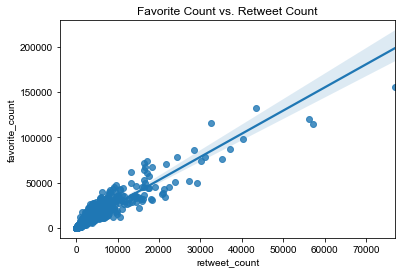

In [52]:
# Map scatter plot between favorites and retweets and plot a line to view the correlation
sns.regplot(twitter_df.retweet_count, twitter_df.favorite_count)
plt.title('Favorite Count vs. Retweet Count')
sns.set(style='darkgrid');

The scatter plot above shows a clear **strong positive correlation** between the count of favorites and of retweets. This means that, in general, the higher the number of favorite counts that higher the number of retweets and vice versa.

**Top 10 of the most popular dog names in the data set**

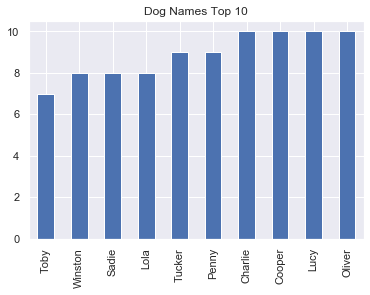

In [53]:
# Plot a bar chart with the top 10 of dog names
twitter_df.name.value_counts()[1:11].sort_values().plot(kind='bar', title = 'Dog Names Top 10');

The four most popular names, with 10 appearances each, are: **Charlie, Lucy, Cooper and Oliver**.

**Top 10 of the most popular dog breeds in the data set**

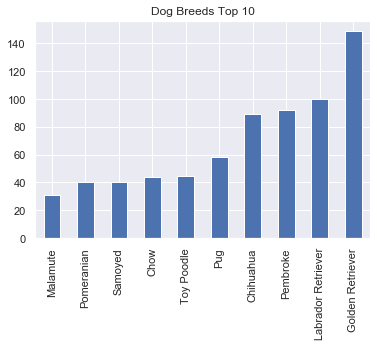

In [54]:
# Plot a bar chart with the top 10 dog breeds
twitter_df.dog_breed.value_counts()[1:11].sort_values().plot(kind='bar', title = 'Dog Breeds Top 10');

The **Golden Retriever** is clearly the most popular dog breed, with a difference of more than 40 appearances than the second, the **Labrador Retriever**.